## Network Science Lab 3

In [1]:
#Run this cell 1st to import numpy, matplotlib, and networkx
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


### Task 1: Evolution of classical random graphs

In this task, you will investigate the properties of the largest connected component (*lcc*) in classical random graphs with $N=101$. You have been provided a function below which computes and returns the size of this component for a graph provided as input

In [2]:
def Ng(G):
    """Compute and return number of nodes in largest connected component of 
    input graph, G"""
    CC= sorted(nx.connected_components(G),key=len)
    return len(CC[-1])

1) Generate a classical random graph with $N=101, p=0.015$ (what do you expect the graph structure to look like?). 

In [19]:
G = nx.erdos_renyi_graph(101, 0.015)

2) Now, compute $S$,  the fraction of the graph's nodes which are in the *lcc*. Does the relationship between $\left<k\right>$ and $S$ match the theoretical result from lecture?

In [20]:
#Add code here
k_bar = sum(nx.degree(G)) / len(G.nodes)
S = Ng(G) / len(G.nodes)

1 - S - exp(- k_bar * S)

0.3960396039603666

3) When $<k> \approx 1$, we expect $N_s$, the number of components with size $s$, to depend on the component size as $N_s \sim s^{-\alpha}$, where $\alpha$ is a parameter that you will now estimate. You have been provided with a function below which returns an array containing the size of each connected component in graph, $G$. 

In [23]:
def Sg(G):
    """Compute the size of each connected component in 
    input graph, G"""
    CC= sorted(nx.connected_components(G),key=len)
    sizes = np.zeros(len(CC))
    for i,CCi in enumerate(CC):
        sizes[i] = len(CCi)
    return sizes

i) Simulate a $G_{Np}$ graph with $N=8000$ and $\left<k\right>=1$ (this may take a little time), and compute the size of each component in the graph

In [58]:
#Add code here
G = nx.gnm_random_graph(8000, 8000)
G = nx.erdos_renyi_graph(8000, 1 / 8000)

In [59]:
Sg(G)

array([  1.,   1.,   1., ...,  60., 110., 315.])

ii) Compute how often each unique component size occurs. The function *np.unique* may be helpful.

In [60]:
#Add code here
s = Sg(G)
u = np.unique(s)
Ns = [np.count_nonzero(s == item) for item in u]

Ns

[2885,
 551,
 210,
 100,
 56,
 46,
 31,
 17,
 19,
 11,
 9,
 5,
 5,
 7,
 4,
 6,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1]

iii) Plot $N_s$ vs. $s$. If appropriate axis scales are used, you should see clear power-law behavior for a reasonable range of $s$.

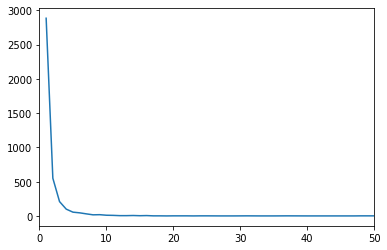

In [61]:
#Add code here
plt.figure()
plt.xlim(0, 50)
plt.plot(u, Ns)
plt.show()

iv)  For the "reasonable" range of $s$ from iii), construct a linear fit between $log(N_s)$ and $log(s)$ (*np.polyfit* can be used to construct the linear fit). What is your estimate for $\alpha$?

In [ ]:
#Add code here

### Task 2: Shortest paths from BFS

The BFS code developed in lecture finds all reachable nodes from a source and computes the distance of the shortest path from the source to each reachable node:

In [2]:
import networkx as nx

def bfs(G,s):
    """
    Input:
    G: networkx graph
    x: source node

    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    L3: Shortest distance from source to nodes in graph
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1] #Labels
    L3 = [-1000 for l in L1] #Distances
    L4 = [[] for l in L1] #Paths 
    Q=[]
    Q.append(s)
    L2[s]=1
    L3[s]=0
    L4[s] = [s]
    while len(Q)>0:
        x = Q.pop(0) #remove node from front of queue
        print("***x=",x,' ***')
        for v in G.adj[x]:
            if L2[v]==0:
                Q.append(v) #add unexplored neighbors to back of queue
                L2[v]=1
                L3[v]=1+L3[x]
                #add code here
            
            print("v=",v)
            print("Q=",Q)
   

    return L2,L3

1) Modify the function above so that it returns a list, *L4*, whose *i+1th* element, *L4[i]* contains a list of nodes for a shortest path between the source and node *i*. For example, L4=[[0],[0,2,3,1],[0,2],[0,3]] would indicate that a shortest path between nodes 0 and 1 is 0->2->3->1. 

In [ ]:
#New function here


2) Test your function with a modestly-sized Barabasi-Albert graph and verify (using networkx) that it computes shortest-paths correctly:

In [1]:
#Add code here

